In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# filename1 = sys.argv[1]
# filename2 = sys.argv[2]

filename1 = 'pagecounts-20190509-120000.txt'
filename2 = 'pagecounts-20190509-130000.txt'

In [3]:
p1 = pd.read_csv(filename1, sep=' ', header=None, index_col=1,names=['lang', 'page', 'views', 'bytes'])
p2 = pd.read_csv(filename2, sep=' ', header=None, index_col=1,names=['lang', 'page', 'views', 'bytes'])
# print(p1)

In [4]:
# df1 = pd.DataFrame.sort_values(p1, by=['views'], ascending=False)
df1 = p1.sort_values('views', ascending = False)
df2 = p1.join(p2, how='left', lsuffix='_1st', rsuffix='_2nd')
# print(df2)

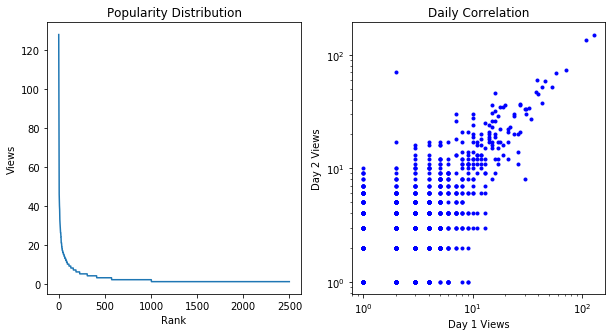

In [5]:
plt.figure(figsize=(10, 5)) # change the size to something sensible
plt.subplot(1, 2, 1) # subplots in 1 row, 2 columns, select the first
plt.plot(df1['views'].values) # build plot 1
plt.title('Popularity Distribution')
plt.xlabel('Rank')
plt.ylabel('Views')

plt.subplot(1, 2, 2) # ... and then select the second
plt.xscale('log')
plt.yscale('log')
plt.plot(df2['views_1st'].values, df2['views_2nd'].values, 'b.') # build plot 2
plt.title('Daily Correlation')
plt.xlabel('Day 1 Views')
plt.ylabel('Day 2 Views')
# plt.show()
plt.savefig('wikipedia.png')